In [1]:
### Imports ##
%matplotlib inline

import random
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.colors import from_levels_and_colors

from matplotlib import animation, rc
from IPython.display import HTML

#TODO clean it up


In [2]:
## constants ##

m, n = 100, 100

p = [[1/(m*n) for _ in range(n)] for _ in range(m)]
world = [[1 if random.random() > 0.2 else 0 for _ in range(n)] for _ in range(m)]
movements = [[0, 0],
             [0, 1],
             [1, 0],
             [-1, 0],
             [0, -1]]

sensor_right = 0.8
sensor_wrong = 1 - sensor_right
p_move = 0.7
p_stay = 1 - p_move


In [3]:
## Functions ##

def sense(p, Z):
    q = [[0 for _ in range(n)] for _ in range(m)]
    norm = 0
    for i in range(m):
        for j in range(n):
            hit = (world[i][j] == Z)
            q[i][j] = p[i][j]*(hit*sensor_right + (1 - hit)*sensor_wrong)
            norm += q[i][j]
    q = [[q[i][j]/norm for j in range(n)] for i in range(m)]
    return q

def move(p, U):
    q = [[0 for _ in range(n)] for _ in range(m)]
    for i in range(m):
        for j in range(n):
            q[i][j] = p_move*p[(i-U[0])%m][(j-U[1])%n] + p_stay*p[i][j]
    return q

def animate(_):
    global p, i, j
    U = random.choice(movements)
    p = sense(p, world[i][j])
    p = move(p, U)
    i = (i + U[0])%m
    j = (j + U[1])%n
    grid.set_data(p)
    smallest = min(min(row) for row in p)
    largest = max(max(row) for row in p)
    grid.set_clim(vmin=0, vmax=largest)
    line.set_xdata(j)
    line.set_ydata(i)
    return grid, line,


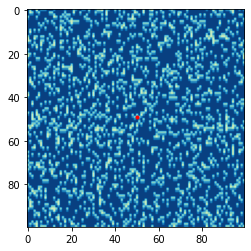

In [4]:
#plt.ion()
fig, ax = plt.subplots()
grid = ax.imshow(p, cmap="GnBu")
line, = ax.plot([], [], 'r.')


i = m//2
j = n//2
"""while True:
    U = random.choice(movements)
    p = sense(p, world[i][j])
    p = move(p, U)
    i = (i + U[0])%m
    j = (j + U[1])%n
    ax.cla()
    ax.imshow(p)
    ax.plot([j], [i], 'r.')
    plt.pause(1e-3)"""


anim = animation.FuncAnimation(fig, animate, 300, interval=50)

# plt.show()
#anim.save("localization_2d.gif", writer="imagemagick")


In [5]:
HTML(anim.to_html5_video())